<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Introduce yourself

Put your team name and team-members' names below

Team name: А.У.Е.  
Team members:
- Павел Ильин
- Владимир Катцын
- Идар Сенкир

# Task

In this task we are working with posts on famous russian advertisement and resell platform.

Ginen information about the post and corresponding item you have to estimate its probability to be sold in 3 days.

Below you will find some desirable stages of your report.

# Data Loading

In [4]:
df_train = pd.read_csv('./train.tsv', sep='\t', index_col=0)
df_test = pd.read_csv('./test_nolabel.tsv', sep='\t', index_col=0)

In [7]:
df_train.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'owner_id',
       'payment_available', 'price', 'product_id', 'product_type',
       'properties', 'region', 'sold_mode', 'subcategory_id', 'sold_fast'],
      dtype='object')

# Descriptive Data Analysis

* Analyze train dataset features
    * Provide some meaningfull description about corresponding features (in form of pictures or some coefficients)
    * Outline any findings you are able to reveal
* Try to measure analyse any correspondense between features and target features

The dataset consists of 19 features. Most of the features are just numbers and categories. Some of them can be used directly, other should be one-hot- or mean- encoded.  
The main goal is to process descriptions and names of products. Descriptions can contain the information about the brands and other things about the product.  

### The most common words from names:

In [12]:
from operator import itemgetter

words = {}
for _, row in df_train.iterrows(): 
    for word in row.name_text.split():
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

sorted_words = sorted(words.items(), key=itemgetter(1))
list(reversed(sorted_words))

[('для', 19869),
 ('на', 12449),
 ('iPhone', 8628),
 ('с', 7398),
 ('Продам', 7010),
 ('в', 6970),
 ('и', 6379),
 ('2', 6187),
 ('м²', 6003),
 ('Samsung', 5909),
 ('1', 5395),
 ('Квартира,', 4698),
 ('Коляска', 4688),
 ('Платье', 4037),
 ('3', 3821),
 ('6', 3622),
 ('Велосипед', 3515),
 ('Куртка', 3410),
 ('4', 3290),
 ('5s', 3236),
 ('5', 3075),
 ('ВАЗ', 2941),
 ('Диван', 2882),
 ('Айфон', 2748),
 ('комната,', 2705),
 ('Кроссовки', 2686),
 ('(Lada)', 2633),
 ('Телевизор', 2620),
 ('Холодильник', 2577),
 ('Стиральная', 2521),
 ('Детская', 2429),
 ('Телефон', 2396),
 ('машина', 2344),
 ('новый', 2242),
 ('размер', 2240),
 ('Sony', 2215),
 ('новые', 2213),
 ('Комбинезон', 2139),
 ('7', 2109),
 ('+', 2097),
 ('Сумка', 2068),
 ('Новый', 2033),
 ('Ботинки', 2027),
 ('Xiaomi', 2022),
 ('Новые', 2009),
 ('Детский', 1983),
 ('детский', 1973),
 ('Отдам', 1966),
 ('Galaxy', 1907),
 ('Костюм', 1897),
 ('Ноутбук', 1893),
 ('б/у', 1835),
 ('Джинсы', 1802),
 ('из', 1789),
 ('мальчика', 1684),
 ('Кро

We can see that the most useful information about the product can be obtained from its name. 
Also, the information about the brands can be obtained from the english text

### The most common english words from names and descriptions:

In [19]:
from nltk.tokenize import RegexpTokenizer
from operator import itemgetter

eng_tokenizer = RegexpTokenizer(r"[a-zA-Z0-9_.+-]*(?:[a-zA-Z][a-zA-Z0-9_.+-]*){2,}")
words = {}
for _, row in df_train.iterrows(): 
    for word in eng_tokenizer.tokenize(row.name_text.lower()):
        if word in words:
            words[word] += 1
        else:
            words[word] = 1
    for word in eng_tokenizer.tokenize(row.desc_text.lower()):
        if word in words:
            words[word] += 1
        else:
            words[word] = 1

sorted_eng_words = sorted(words.items(), key=itemgetter(1))
sorted_eng_words = list(reversed(sorted_eng_words))
sorted_eng_words

[('iphone', 17794),
 ('samsung', 10401),
 ('gb', 4904),
 ('galaxy', 4445),
 ('usb', 4120),
 ('sony', 3840),
 ('intel', 3802),
 ('16gb', 3279),
 ('xiaomi', 3236),
 ('asus', 3092),
 ('wi-fi', 3074),
 ('hd', 3012),
 ('lg', 2781),
 ('core', 2726),
 ('lada', 2715),
 ('apple', 2590),
 ('bluetooth', 2468),
 ('plus', 2436),
 ('32gb', 2152),
 ('android', 2123),
 ('pro', 1984),
 ('ps4', 1953),
 ('windows', 1901),
 ('redmi', 1858),
 ('geforce', 1830),
 ('lenovo', 1814),
 ('lte', 1741),
 ('64gb', 1711),
 ('amd', 1674),
 ('hdmi', 1671),
 ('ddr3', 1670),
 ('xbox', 1663),
 ('gtx', 1637),
 ('gold', 1482),
 ('mini', 1478),
 ('playstation', 1442),
 ('black', 1401),
 ('note', 1400),
 ('adidas', 1397),
 ('hp', 1396),
 ('ipad', 1356),
 ('gps', 1342),
 ('se', 1338),
 ('hdd', 1336),
 ('zara', 1325),
 ('acer', 1268),
 ('touch', 1213),
 ('nvidia', 1208),
 ('of', 1201),
 ('radeon', 1185),
 ('4gb', 1180),
 ('canon', 1169),
 ('honor', 1169),
 ('one', 1157),
 ('baby', 1137),
 ('2gb', 1133),
 ('sim-', 1133),
 ('nik

### sold_fast rates for top-50 english words:

In [48]:
rates = []
name_lower = df_train.name_text.str.lower()
desc_lower = df_train.desc_text.str.lower()
words_to_find = [word for word, _ in sorted_eng_words[:50]]
for word in words_to_find:
    word_idx = (name_lower.str.contains(word) | desc_lower.str.contains(word))
    word_cnt = word_idx.sum()
    sold_fast_cnt = df_train[word_idx].sold_fast.sum()
    rates.append(sold_fast_cnt/word_cnt)

words_sorted_by_rate = sorted(zip(rates, words_to_find))

<BarContainer object of 50 artists>

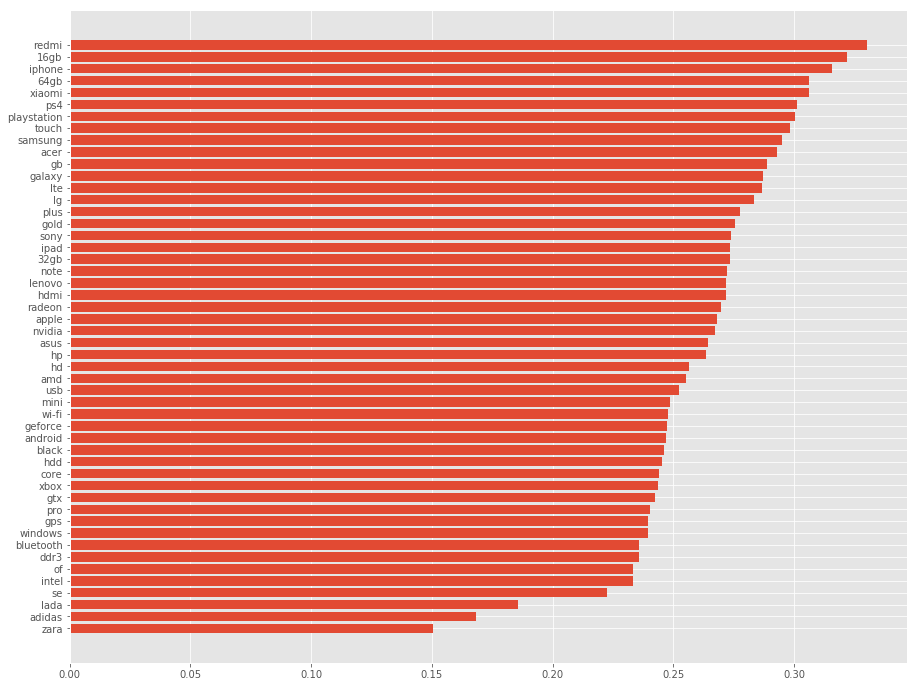

In [49]:
plt.figure(figsize=(15,12))
plt.barh(y=[word for _, word in words_sorted_by_rate], width=[rate for rate, _ in words_sorted_by_rate])

### Avg prices over top-50 words

<BarContainer object of 48 artists>

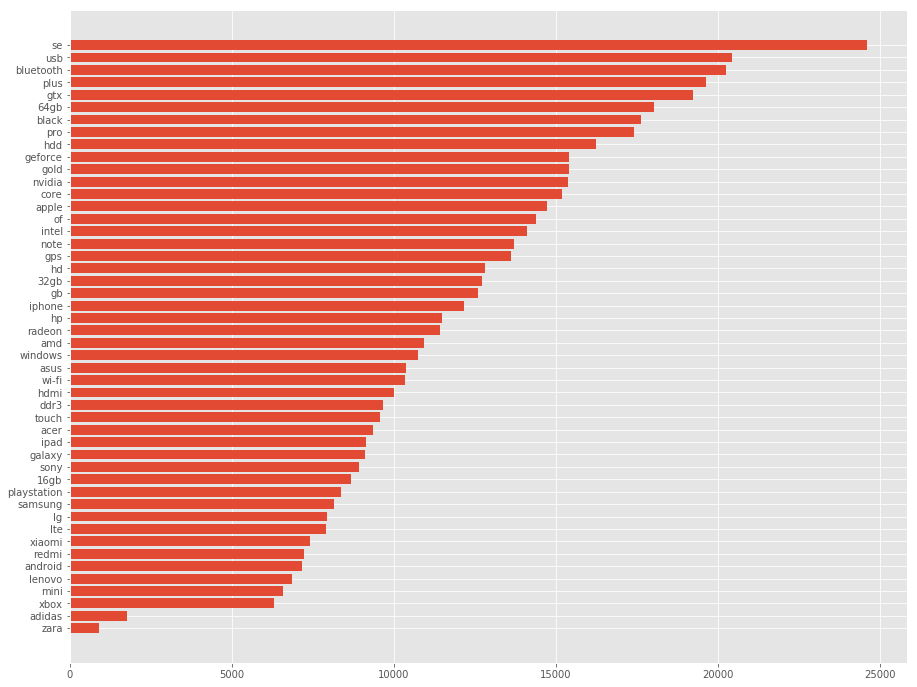

In [60]:
prices_and_words = []
name_lower = df_train.name_text.str.lower()
desc_lower = df_train.desc_text.str.lower()
words_to_find = [word for word, _ in sorted_eng_words[:50]]
for word in words_to_find:
    word_idx = (name_lower.str.contains(word) | desc_lower.str.contains(word))
    prices_and_words.append((df_train[word_idx].price.mean(), word))

prices_and_words.sort()
plt.figure(figsize=(15,12))
# PS4 and lada cost too much
plt.barh(y=[word for _, word in prices_and_words[:48]], width=[price for price, _ in prices_and_words[:48]])

### sold_fast rate over items which are cheaper than avg with same words in name/description

<BarContainer object of 50 artists>

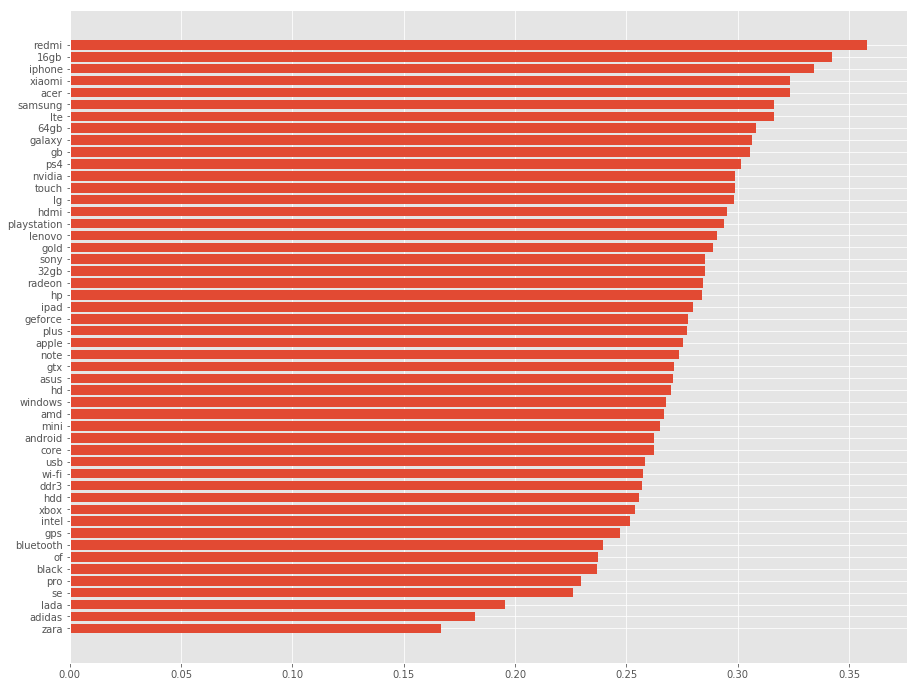

In [67]:
rates_and_words = []
name_lower = df_train.name_text.str.lower()
desc_lower = df_train.desc_text.str.lower()
for avg_price, word in prices_and_words:
    selected_idx = (name_lower.str.contains(word) | desc_lower.str.contains(word)) & (df_train.price < avg_price)
    selected_cnt = selected_idx.sum()
    sold_fast_cnt = df_train[selected_idx].sold_fast.sum()
    rates_and_words.append((sold_fast_cnt/selected_cnt, word))
rates_and_words.sort()
plt.figure(figsize=(15,12))
plt.barh(y=[word for _, word in rates_and_words], width=[rate for rate, _ in rates_and_words])

### sold_fast rate over items which are more expensive than avg with same words in name/description

<BarContainer object of 50 artists>

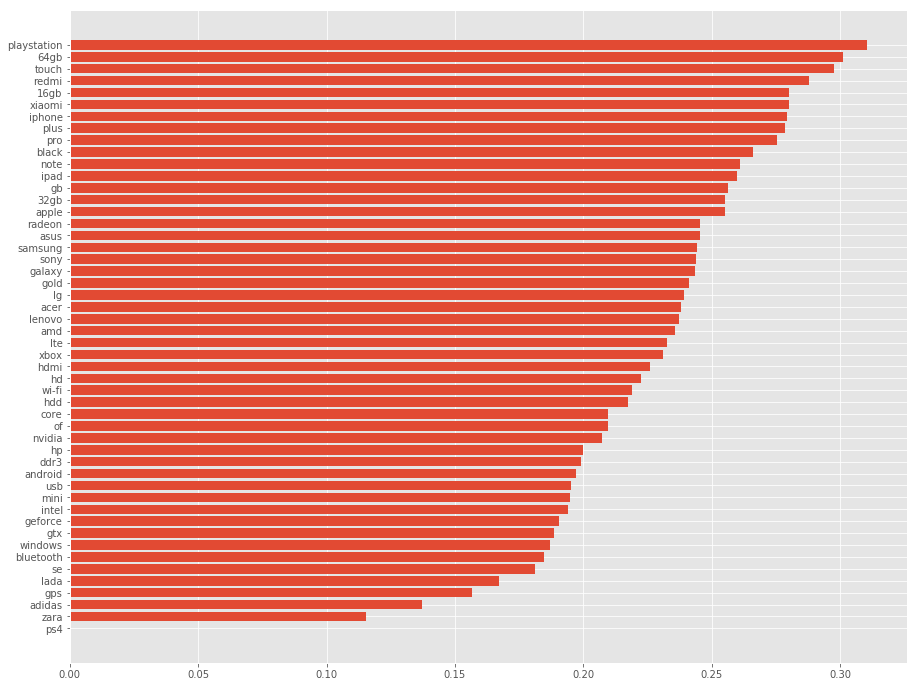

In [68]:
rates_and_words = []
name_lower = df_train.name_text.str.lower()
desc_lower = df_train.desc_text.str.lower()
for avg_price, word in prices_and_words:
    selected_idx = (name_lower.str.contains(word) | desc_lower.str.contains(word)) & (df_train.price > avg_price)
    selected_cnt = selected_idx.sum()
    sold_fast_cnt = df_train[selected_idx].sold_fast.sum()
    rates_and_words.append((sold_fast_cnt/selected_cnt, word))
rates_and_words.sort()
plt.figure(figsize=(15,12))
plt.barh(y=[word for _, word in rates_and_words], width=[rate for rate, _ in rates_and_words])

### sold_fast rates for categories

<BarContainer object of 24 artists>

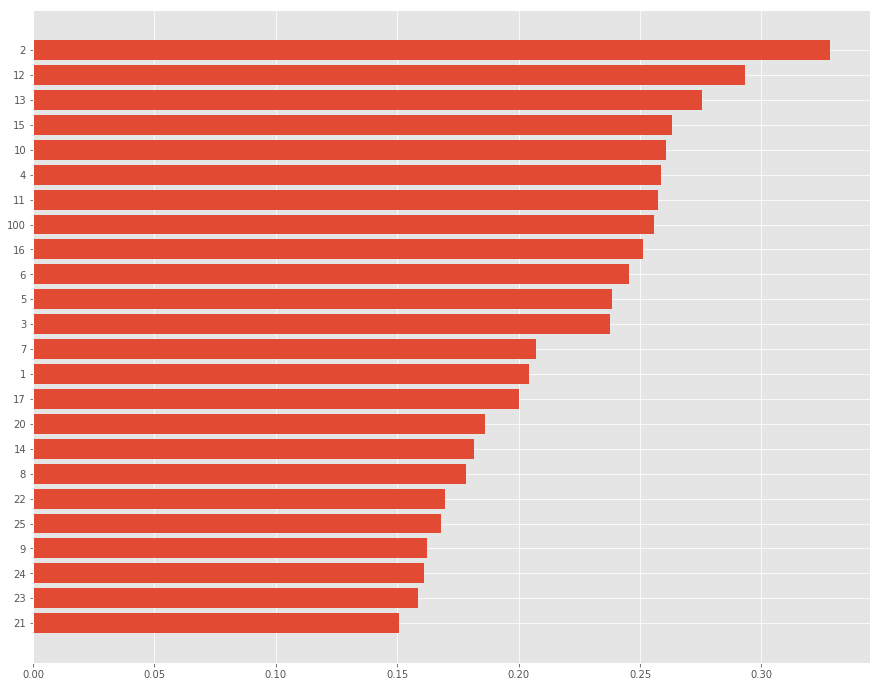

In [45]:
rates_and_categories = []
for category_id in df_train.category_id.unique():
    category_idx = df_train.category_id == category_id
    category_cnt = category_idx.sum()
    sold_fast_cnt = df_train[category_idx].sold_fast.sum()
    rates_and_categories.append((sold_fast_cnt/category_cnt, category_id))
rates_and_categories.sort()
plt.figure(figsize=(15,12))
plt.barh(y=[str(category_id) for _, category_id in rates_and_categories], width=[rate for rate, _ in rates_and_categories])

# (almost) Zero-knowledge prediction
* Develop non-machine learning approach to get predictions
    * Describe it and measure its quality on Kaggle

If an item has lower price avg price of other items with the same english words, it's score will be 0.1, otherwise – 0  
If an item does not contain words from top-200 english, its score will be 0.5

In [74]:
words_to_find=sorted_eng_words[:200]
words_and_avgs = []
name_lower = df_train.name_text.str.lower()
desc_lower = df_train.desc_text.str.lower()
for word, _ in words_to_find:
    selected_idx = (name_lower.str.contains(word) | desc_lower.str.contains(word))
    words_and_avgs.append((word, df_train[selected_idx].price.mean()))
    

In [77]:
scores = []
for _, row in df_test.iterrows():
    for word, word_avg in words_and_avgs:
        if row.desc_text.lower().find(word) != -1 or row.name_text.lower().find(word) != -1:
            if row.price > word_avg:
                scores.append(0)
            else:
                scores.append(1)
            break
    else:
        scores.append(0.5)

In [82]:
result = pd.DataFrame({"product_id": df_test.product_id, "score": scores})
result.to_csv("result_noml.csv", index=False)

Score is 0.51907. It's not very random!

# Machine-learning pipeline and prediction

Here you develop your pipeline, generate features for train and test sets
* Your pipeline should be reproducible - make sure you set all `random_states` if needed

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import pandas as pd
import numpy as np
import nltk
import json
import pickle
from typing import Dict, Tuple, Any, Set
import gensim.downloader as api
from gensim.summarization import keywords
from nltk.corpus import stopwords
import string
import pymorphy2
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.model_selection import ParameterGrid


# In[2]:


train_dataset = pd.read_csv("train.tsv", sep="\t")
test_dataset = pd.read_csv("test_nolabel.tsv", sep="\t")


# In[3]:


train_dataset, test_dataset = train_test_split(train_dataset, test_size=0.25)
train_dataset.reset_index(inplace=True, drop=True)
test_dataset.reset_index(inplace=True, drop=True)


# # Feature engineering

# In[4]:


train_dataset.columns


# In[5]:


model = api.load("word2vec-ruscorpora-300")
morph = pymorphy2.MorphAnalyzer()
tokenizer = RegexpTokenizer(r'[а-яА-Я]+')
stop_words = set(stopwords.words("russian"))


# In[6]:


def top_brands(count: int) -> Set[str]:
    eng_tokenizer = RegexpTokenizer(r"[a-zA-Z0-9_.+-]*(?:[a-zA-Z][a-zA-Z0-9_.+-]*){2,}")
    words_cnt = {}
    for num, (_, row) in enumerate(train_dataset.iterrows()):
        if num % 1000 == 0:
            print(f"row_num: {num}/{train_dataset.shape[0]}")
        eng_words = eng_tokenizer.tokenize(row.desc_text)
        eng_words_name = eng_tokenizer.tokenize(row.name_text)
        for word in eng_words:
            word = word.lower()
            if word not in words_cnt:
                words_cnt[word] = 1
            else:
                words_cnt[word] += 1
        for word in eng_words_name:
            word = word.lower()
            if word not in words_cnt:
                words_cnt[word] = 1
            else:
                words_cnt[word] += 1
    import operator
    sorted_words = sorted(words_cnt.items(), key=operator.itemgetter(1))
    
    return set(item[0] for item in list(reversed(sorted_words))[:count])
brands_to_find = top_brands(200)


# In[7]:


def avg_pool_text(text: str) -> np.array:
    sentence = tokenizer.tokenize(text)
    sentence = [word for word in sentence if word not in stop_words]
    vector = np.zeros(300)
    used_words = 0
    for word in sentence:
        parsed = morph.parse(word)[0]
        pos = parsed.tag.POS
        normal_form = parsed.normal_form
        try:
            vector += model.get_vector(f"{normal_form}_{pos}")
            used_words+=1
        except:
            pass
    if used_words == 0:
        return vector
    return vector/used_words


# In[8]:


def get_mean_values(column_name: str) -> Tuple[Dict[Any, float], float]:
    """Returns the mean value for each possible categorial value and the mean value over all categorial values"""
    column_sold_fast_rate = {}
    for value in train_dataset[column_name].unique():
        value_idx = train_dataset[column_name] == value
        value_cnt = value_idx.sum()
        value_sold_fast_cnt = train_dataset[value_idx]["sold_fast"].sum()
        column_sold_fast_rate[value] = value_sold_fast_cnt/value_cnt
    return column_sold_fast_rate, sum(column_sold_fast_rate.values())/len(column_sold_fast_rate)


# In[9]:


city_sold_fast_rate, avg_cities_sold_fast_rate = get_mean_values("city")


# In[10]:


region_sold_fast_rate, avg_regions_sold_fast_rate = get_mean_values("region")


# In[11]:


subcategory_sold_fast_rate, avg_subcategory_sold_fast_rate = get_mean_values("subcategory_id")


# In[12]:


def get_features(data: pd.DataFrame) -> pd.DataFrame:
    data = data.copy()
    data.loc[:, "desc_text"] = data.desc_text.str.lower()
    data.loc[:, "name_text"] = data.name_text.str.lower()
    # data.loc[:, "desc_len"] = data["desc_text"].apply(len)'
    # text features
    data.loc[:, "desc_words_cnt"] = data["desc_text"].apply(lambda x: len(x.split()))
    
    
    # City features
    data.loc[:, "city_sold_fast_rate"] = data["city"].apply(lambda x: city_sold_fast_rate.get(x, avg_cities_sold_fast_rate))
    
    # Region features
    data.loc[:, "region_sold_fast_rate"] = data["region"].apply(lambda x: region_sold_fast_rate.get(x, avg_regions_sold_fast_rate))
    
    # Subcategory features
    data.loc[:, "subcategory_sold_fast_rate"] = data["subcategory_id"].apply(lambda x: subcategory_sold_fast_rate.get(x, avg_subcategory_sold_fast_rate))
    
    data.loc[:, "year"] = data.date_created.apply(lambda x: float(x.split("-")[0]))
    data.loc[:, "month"] = data.date_created.apply(lambda x: float(x.split("-")[1]))
    data.loc[:, "day"] = data.date_created.apply(lambda x: float(x.split("-")[2]))
    data.loc[:, "delivery_available"] = data.delivery_available.astype(np.int64)
    data.loc[:, "payment_available"] = data.payment_available.astype(np.int64)
    
    print("finding brands")
    prev_letter = "1"
    for brand_name in brands_to_find:
        if not brand_name.startswith(prev_letter):
            prev_letter = brand_name[0]
            print("Letter: ", prev_letter)
        data.loc[:, f"text_contains_{brand_name}"] = (data.desc_text.str.contains(brand_name) | 
                                                      data.name_text.str.contains(brand_name)).astype(np.int64)
        

#     print("Text processing")
#     #desc_pooled = []
#     name_pooled = []
#     for row_num, (_, row) in enumerate(data.iterrows()):
#         if row_num % 1000 == 0:
#             print(f"row: {row_num}/{data.shape[0]}")
#         #desc_pooled.append(avg_pool_text(row.desc_text))
#         name_pooled.append(avg_pool_text(row.name_text))
#     #desc_df = pd.DataFrame(desc_pooled).rename(columns={i: f"desc_{i}" for i in range(300)})
#     name_df = pd.DataFrame(name_pooled).rename(columns={i: f"name_{i}" for i in range(300)})
    
    data.drop([
       'Unnamed: 0', 'city', 'date_created',
        'desc_text',
       'name_text', 'owner_id', 'product_id',
        'properties', 'region'
    ], axis=1, inplace=True)
    
    
    
    return data




# In[ ]:


# def get_features(data: pd.DataFrame) -> pd.DataFrame:
#     data = data.copy()
#     data.loc[:, "desc_text"] = data.desc_text.str.lower()
#     data.loc[:, "name_text"] = data.name_text.str.lower()
#     # data.loc[:, "desc_len"] = data["desc_text"].apply(len)'
#     # text features
#     data.loc[:, "desc_words_cnt"] = data["desc_text"].apply(lambda x: len(x.split()))
    
    
#     # City features
#     data.loc[:, "city_sold_fast_rate"] = data["city"].apply(lambda x: city_sold_fast_rate.get(x, avg_cities_sold_fast_rate))
    
#     # Region features
#     data.loc[:, "region_sold_fast_rate"] = data["region"].apply(lambda x: region_sold_fast_rate.get(x, avg_regions_sold_fast_rate))
    
#     # Subcategory features
#     data.loc[:, "subcategory_sold_fast_rate"] = data["subcategory_id"].apply(lambda x: subcategory_sold_fast_rate.get(x, avg_subcategory_sold_fast_rate))
    
#     data.loc[:, "year"] = data.date_created.apply(lambda x: float(x.split("-")[0]))
#     data.loc[:, "month"] = data.date_created.apply(lambda x: float(x.split("-")[1]))
#     data.loc[:, "day"] = data.date_created.apply(lambda x: float(x.split("-")[2]))
#     data.loc[:, "delivery_available"] = data.delivery_available.astype(np.int64)
#     data.loc[:, "payment_available"] = data.payment_available.astype(np.int64)
    
#     print("finding brands")
#     prev_letter = "1"
#     for brand_name in brands_to_find:
#         if not brand_name.startswith(prev_letter):
#             prev_letter = brand_name[0]
#             print("Letter: ", prev_letter)
#         data.loc[:, f"text_contains_{brand_name}"] = (data.desc_text.str.contains(brand_name) | 
#                                                       data.name_text.str.contains(brand_name)).astype(np.int64)
        

#     print("Text processing")
#     #desc_pooled = []
#     name_pooled = []
#     for row_num, (_, row) in enumerate(data.iterrows()):
#         if row_num % 1000 == 0:
#             print(f"row: {row_num}/{data.shape[0]}")
#         #desc_pooled.append(avg_pool_text(row.desc_text))
#         name_pooled.append(avg_pool_text(row.name_text))
#     #desc_df = pd.DataFrame(desc_pooled).rename(columns={i: f"desc_{i}" for i in range(300)})
#     name_df = pd.DataFrame(name_pooled).rename(columns={i: f"name_{i}" for i in range(300)})
    
#     data.drop([
#        'Unnamed: 0', 'city', 'date_created',
#         'desc_text',
#        'name_text', 'owner_id', 'product_id',
#         'properties', 'region'
#     ], axis=1, inplace=True)
    
    
    
#     return pd.concat([data, name_df], axis=1)





# In[ ]:


# def get_features(data: pd.DataFrame) -> pd.DataFrame:
#     data = data.copy()
#     data.loc[:, "desc_text"] = data.desc_text.str.lower()
#     data.loc[:, "name_text"] = data.name_text.str.lower()
#     # data.loc[:, "desc_len"] = data["desc_text"].apply(len)'
#     # text features
#     data.loc[:, "desc_words_cnt"] = data["desc_text"].apply(lambda x: len(x.split()))
    
    
#     # City features
#     data.loc[:, "city_sold_fast_rate"] = data["city"].apply(lambda x: city_sold_fast_rate.get(x, avg_cities_sold_fast_rate))
    
#     # Region features
#     data.loc[:, "region_sold_fast_rate"] = data["region"].apply(lambda x: region_sold_fast_rate.get(x, avg_regions_sold_fast_rate))
    
#     # Subcategory features
#     data.loc[:, "subcategory_sold_fast_rate"] = data["subcategory_id"].apply(lambda x: subcategory_sold_fast_rate.get(x, avg_subcategory_sold_fast_rate))
    
#     data.loc[:, "year"] = data.date_created.apply(lambda x: float(x.split("-")[0]))
#     data.loc[:, "month"] = data.date_created.apply(lambda x: float(x.split("-")[1]))
#     data.loc[:, "day"] = data.date_created.apply(lambda x: float(x.split("-")[2]))
#     data.loc[:, "delivery_available"] = data.delivery_available.astype(np.int64)
#     data.loc[:, "payment_available"] = data.payment_available.astype(np.int64)
    
#     print("finding brands")
#     prev_letter = "1"
#     for brand_name in brands_to_find:
#         if not brand_name.startswith(prev_letter):
#             prev_letter = brand_name[0]
#             print("Letter: ", prev_letter)
#         data.loc[:, f"text_contains_{brand_name}"] = (data.desc_text.str.contains(brand_name) | 
#                                                       data.name_text.str.contains(brand_name)).astype(np.int64)
        

#     print("Text processing")
#     desc_pooled = []
#     name_pooled = []
#     for row_num, (_, row) in enumerate(data.iterrows()):
#         if row_num % 1000 == 0:
#             print(f"row: {row_num}/{data.shape[0]}")
#         desc_pooled.append(avg_pool_text(row.desc_text))
#         name_pooled.append(avg_pool_text(row.name_text))
#     desc_df = pd.DataFrame(desc_pooled).rename(columns={i: f"desc_{i}" for i in range(300)})
#     name_df = pd.DataFrame(name_pooled).rename(columns={i: f"name_{i}" for i in range(300)})
    
#     data.drop([
#        'Unnamed: 0', 'city', 'date_created',
#         'desc_text',
#        'name_text', 'owner_id', 'product_id',
#         'properties', 'region'
#     ], axis=1, inplace=True)
    
    
    
#     return pd.concat([data,name_df, desc_df], axis=1)


# In[13]:


preprocessed_df = get_features(train_dataset)


# In[14]:


preprocessed_test = get_features(test_dataset)


# In[15]:


train_lgb_ds = lgb.Dataset(
    preprocessed_df.drop("sold_fast", axis=1), 
    label=preprocessed_df["sold_fast"], 
    categorical_feature=[
        "category_id", "subcategory_id", "delivery_available", "payment_available", "product_type", 
    ]
)
test_lgb_ds = lgb.Dataset(
    preprocessed_test.drop("sold_fast", axis=1), 
    label=preprocessed_test["sold_fast"],
    categorical_feature=[
        "category_id", "subcategory_id", "delivery_available", "payment_available", "product_type", 
    ]
)
params = { 
    'num_leaves': 70, 
    'objective': 'binary', 
    'metric': 'auc', 
    'learning_rate': 0.02, 
    'min_data_in_leaf': 10, 
    'boosting' : 'gbdt', 
    'max_bin' : 30, 
}
gbm = lgb.train(params,
                train_lgb_ds,
                num_boost_round=500,
                valid_sets=[test_lgb_ds],
                early_stopping_rounds=7
               )


# In[ ]:





# In[16]:


y_score_test = gbm.predict(preprocessed_test.drop('sold_fast', axis=1).values)


# In[17]:


from sklearn.metrics import roc_auc_score
roc_auc_score(preprocessed_test.sold_fast, y_score_test)


# # Submitting

# In[18]:


submit_dataset = pd.read_csv("test_nolabel.tsv", sep="\t")


# In[20]:


processed_submit = get_features(submit_dataset)


# In[23]:


y_score = gbm.predict(processed_submit.values)


# In[26]:


result = pd.DataFrame({"product_id": submit_dataset.product_id, "score": y_score})


# In[27]:


result.to_csv("result.csv", index=False)


# In[ ]:





# In[ ]:






# Model interpretation
Try to interpret your model results
* What **knowledge** does it reveal?

Our model gives very poor results. To be fair, we did not spend a lot of time training the model and submitted the first prediction at the evening of June, 14th  
We tried to use some MLP techniques. For example, we tried to use pre-trained word embeddings and created columns which indicated if name or description contained words from top-200 english word list.  
A good model would consider many features. For example,extract the information about condition, price, brands and other things. That's why pre-trained embeddings are not good choice. 

# Alternative solutions

We considered a Neural network with the following structure:

![](https://i.imgur.com/bYT1hn6.jpg)

Embedding layers, LSTMs (one of them can be replaced with an attention model) and MLP are trained together. Therefore, RNNs can extract really useful information from the text and pass it to the MLP.  
MLP is great at classifying non-linear separable cases and extracting additional features. For example, it can check if an item is in good condition (it can be kind of extracted by LSTM) and if it doesn't cost much, and then count it as a positive case.  
Training neural networks is more complicated task than training LightGBM, and we also didnt have GPU, so we decided to use LightGBM as we didn't have much time.